In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_excel(f'../../../code-mixed-enta/hasoc_task_2/Tamil-Codemixed_offensive_data_Training-Tweet-HL.xlsx', header=None)
df_train.replace(to_replace='not', value='NOT', inplace=True)
df_train.replace(to_replace='OFf', value='OFF', inplace=True)
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.head()

,0,1,2
0,TA_HL109,1st baby ku neat ah feed panunga plzz ipdi iru...,NOT
1,TA_HL982,video play agurathuku munnadi pall kudikuranu ...,OFF
2,TA_HL644,meera nee ellam our pombalaiya poorike,OFF
3,TA_TW3208,RT @USER : Ommala ipo neenga lam meesaiya mazh...,OFF
4,TA_TW910,@USER ungotha semaya doubles vanguva pola.. ne...,OFF


In [3]:
df_train.shape

(4000, 3)

In [4]:
df_test = pd.read_csv('../../../code-mixed-enta/hasoc_task_2/Tamil_hasoc_tanglish_test_without_labels.tsv', sep='\t', header=None)
df_test.dropna(inplace=True)
df_test.tail()

,0,1
935,TA_TW15928,Woman with a bhindi picture on a logo promotes...
936,TA_TW10014,Worst ra Vara vara Namma Society kevalama poit...
937,TA_TW10134,Yeallarukum reply pandringa namma #TAG RakidaR...
938,TA_TW10418,Yeva yeva valkaiyelam flashlight adicha maari ...
939,TA_TW13798,Deiii udhay sunniya oomburathuku 200 pothumad...


In [5]:
df_test.shape

(940, 2)

In [6]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [9]:
count = 0
for index, row in df_train.iterrows():
    if not only_roman_chars(row[1]):
        print(index, row[0], row[1], row[2])
        print('\n\n')
        count += 1
print(1 - count/len(df_train))

843 TA_HL598 losliya oru fake person and aabala porikiiiii ˆ ˆ ˆ ˆ ˆ ˆ ˆ ˆ OFF



1092 TA_HL472 ippdi than iruku .vara onu illa waste da ithu. Žˆ Žˆ Žˆ Žˆthan irukum OFF



1653 TA_HL153 Ada saniyane.... ’¦ ’¦ ’¦ pani padaram, puna mani, sarapampu and finally matu ravi ‚ ˆ ‘¿   ¡ ¤ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ µ ‡ ™Š OFF



2094 TA_HL271 cheran is very honest... losliya poruki kavin porukiyoda ....vanitha yedhuku à®‰à®³à¯à®³ à®µà®¨à¯à®¤à®¾? OFF



2536 TA_HL854 seruppu seruppu......kalla kumbidura unakku theriyathu magane ......po........moditu poriyaa....à®µà®¿à®•à¯à®•à¯ à®®à®£à¯à® à¯ˆà®¯à®¾.... OFF



2899 TA_HL163 adhutha à®ªà®¾à®²à¯ , peter paul ku than. Vijay Kumar family , irukkuradhu thappey illa NOT



3079 TA_HL125 à®•à¯à®´à®¨à¯à®¤à¯ˆ ga taste ah saptanum nu ninappanga nenga eappo pathalum paal satham, paruppu, neai, nu thantha avanga saptave pidikkathu nenga mathi mathi tharanum NOT



3482 TA_HL1045 ethulam ponna chi ¤ª   OFF



3711 TA_HL955 vanitha à®µà¯‡ à®

In [ ]:
# à®®à®£à¯à® à¯ˆà®¯à®¾....
# vanitha à®µà¯‡ à®ªà®°à¯à®•à®µà¯‡ irritate irukku.
# ¤£ ¤£ ¤£ ¤£ ¤£ ¤£ µ ‡ ™Š
# contains non-ascii characters

In [15]:
count = 0
for index, row in df_test.iterrows():
    if not only_roman_chars(row[1]):
        print(index, row[0], row[1], row[2])
        print('\n\n')
        count += 1
print(1 - count/len(df_test))

1.0


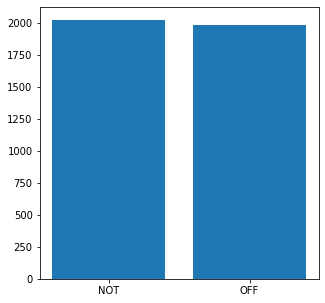

In [10]:
# Class distribution in training set
D = Counter(df_train[2])
plt.rcParams["figure.figsize"] = (5,5)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [12]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  1980
Max no. of sentences:  2020
Avg no. of sentences:  2000
Median of sentences:  2000.0


In [13]:
def tokenize(s: str):
    return s.split()

In [16]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tokenize((row[1]).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  66
Avg no. of tokens:  18.3305
Median of no. of tokens:  16.0


In [17]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tokenize((row[1]).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  55
Avg no. of tokens:  17.31382978723404
Median of no. of tokens:  15.0
